In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
X = boston.data
Y = boston.target

X.shape

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

(506, 13)

In [3]:
Y.shape

(506,)

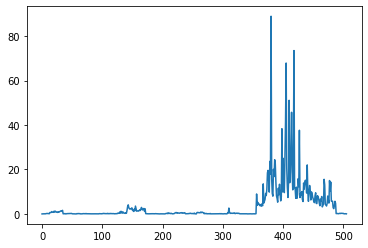

In [4]:
import matplotlib.pyplot as plt
plt.plot(boston.data[:,0]) #第一個column的所有row

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.1)
lr = LinearRegression(normalize=True)


In [6]:
lr.fit(X_train,Y_train)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


LinearRegression(normalize=True)

In [7]:
lr.intercept_  #w0   F=w0+w1x1+w2x2+w3x3+.... 常數項

33.62757545156205

In [8]:
lr.coef_    #w1 w2 w3 ....   F=w0+w1x1+w2x2+w3x3+.... 係數項

array([-9.22123795e-02,  4.44122901e-02,  1.63684865e-02,  2.78076567e+00,
       -1.74445632e+01,  4.16835177e+00, -5.96276229e-03, -1.46509360e+00,
        2.71852904e-01, -1.17247948e-02, -9.25894656e-01,  9.03555609e-03,
       -4.80892340e-01])

In [9]:
lr.predict(X_test)

array([18.49180213, 31.39753308, 22.23003219, 24.60843397, 32.33736982,
       21.37537199, 20.85135924, 20.20850653, 20.7804422 , 14.45061394,
       22.8124979 , 22.36532763, 21.91127287, 32.14797476, 18.25159661,
       23.78453112, 20.35197121, 16.17809325, 21.46831393, 37.45444969,
       20.4315214 , 16.23414361, 25.19576204, 27.36954321, 14.45979529,
       16.29734814, 25.55638124, 25.13797269, 18.94777809, 17.25314842,
       29.19015022, 24.78383161, 31.96561663, 25.52413441, 27.86262228,
       23.94269628, 20.41937676, 27.34136305, 25.51694416, 21.349045  ,
       41.23427675, 24.87653693,  9.51877433, 17.32732358, 16.66235988,
       22.27895114, 16.98013177, 24.40449989, 14.92964067, 12.72806846,
       23.47781717])

In [10]:
Y_test

array([18.4, 29.9, 11.9, 25. , 31.6, 19.3, 20.9, 13.1, 21.5, 11. , 20.4,
       22.5, 22. , 29. , 20. , 22.2, 16.2, 13.3, 21. , 42.3, 18.3, 13.1,
       28.7, 27.1, 10.9, 20.2, 29.8, 24.8, 14.1, 17.2, 24.1, 21.4, 32.2,
       24.2, 22.8, 21.9, 20.1, 25.2, 15. , 18.7, 48.8, 24.7, 14.4, 19.5,
       17.3, 20. , 10.2, 50. , 13.4, 27.5, 19.4])

In [11]:
lr.score(X_test,Y_test)

0.5589472363980825

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lr,X,Y,cv=10,scoring='r2')  #CV=幾折交叉驗證 scoring要看使用的model 這裡lr 使用r2
scores 

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

array([ 0.73376082,  0.4730725 , -1.00631454,  0.64113984,  0.54766046,
        0.73640292,  0.37828386, -0.12922703, -0.76843243,  0.4189435 ])

In [13]:
scores = cross_val_score(lr,X,Y,cv=7,scoring='r2')  #CV=幾折交叉驗證  # 沒做前處理
scores 

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

array([ 0.6534446 ,  0.59631685,  0.67865382,  0.61193393,  0.51940514,
       -0.30577687,  0.4001835 ])

In [14]:
scores.mean()

0.450594424713629

In [15]:
from sklearn.preprocessing import Normalizer
no = Normalizer()
X_nor = no.fit_transform(X)
scores = cross_val_score(lr,X_nor,Y,cv=7,scoring='r2')  #CV=幾折交叉驗證
scores 

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

array([0.67032314, 0.69000741, 0.67359846, 0.75185905, 0.64956   ,
       0.08606477, 0.43701591])

In [16]:
scores.mean()

0.5654898212056845

In [17]:
from sklearn.linear_model import Ridge
rg = Ridge(alpha=0.001,normalize=True) #  可調整
rg_scores = cross_val_score(rg,boston.data,boston.target,cv=7,scoring='r2')

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

In [18]:
rg_scores.mean()

0.45223028398254705

In [19]:
rg1 = Ridge(alpha=0.1,normalize=True)
rg2 = Ridge(alpha=1.0,normalize=True)

In [20]:
rg1_scores = cross_val_score(rg1,boston.data,boston.target,cv=7,scoring='r2')
rg1_scores.mean()

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

0.5147909225529965

In [21]:
rg2_scores = cross_val_score(rg2,boston.data,boston.target,cv=7,scoring='r2')
rg2_scores.mean()

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To repr

0.43249057652338674

In [22]:
from sklearn.linear_model import RidgeCV
rg = RidgeCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)
rg.fit(boston.data,boston.target)
rg.score(boston.data,boston.target)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), _RidgeGCV())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.7403788769476062

In [23]:
rg.alpha_

0.01

In [24]:
from sklearn.linear_model import Lasso
ls = Lasso(alpha=0.001,normalize=True)
ls_scores = cross_val_score(ls,boston.data,boston.target,cv=7,scoring='r2')
ls_scores.mean()

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage

0.46171383471249244

In [25]:
from sklearn.linear_model import LassoCV
ls = LassoCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),normalize=True)
ls.fit(boston.data,boston.target)
ls.score(boston.data,boston.target)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Lasso())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


0.7195373311915958

In [26]:
ls.alpha_

0.01

In [27]:
from sklearn.linear_model import ElasticNet,ElasticNetCV
en = ElasticNet(alpha=0.001,l1_ratio=0.8,normalize=True)
en_scores = cross_val_score(en,boston.data,boston.target,cv=7,scoring='r2')
encv = ElasticNetCV(alphas=(1.0,0.1,0.01,0.005,0.0025,0.001,0.00025),l1_ratio=(0.1,0.25,0.5,0.75,0.8),normalize=True)
encv.fit(boston.data,boston.target)
en_scores.mean()

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), ElasticNet())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to original_alpha * np.sqrt(n_samples) if l1_ratio is 1, and to original_alpha * n_samples if l1_ratio is 0. For other values of l1_ratio, no analytic formula is available.
  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecat

0.51153230030417

In [28]:
encv.score(boston.data,boston.target)

0.7132434772603585

In [29]:
encv.alpha_

0.001

In [30]:
encv.l1_ratio_

0.5

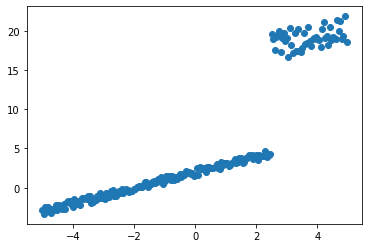

In [31]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)
nb_samples = 200
nb_noise_samples = 150

X = np.arange(-5,5,0.05)
Y = X+2
Y += np.random.uniform(-0.5,0.5,size=nb_samples)
for i in range (nb_noise_samples,nb_samples):
    Y[i] += np.random.uniform(12,15)

plt.scatter(X,Y)


In [32]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X.reshape(-1,1),Y.reshape(-1,1))
lr.intercept_


C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


array([5.36902167])

In [33]:
lr.coef_

array([[2.49585599]])

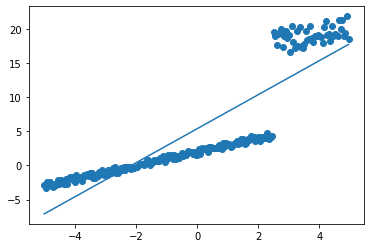

In [34]:
plt.scatter(X,Y)
Yp = lr.intercept_ + X*lr.coef_
plt.plot(X,Yp.reshape(-1,1))

In [35]:
from sklearn.linear_model import RANSACRegressor
rs = RANSACRegressor(lr)
rs.fit(X.reshape(-1,1),Y.reshape(-1,1))
rs.estimator_.intercept_

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

array([1.99772335])

In [36]:
rs.estimator_.coef_

array([[1.00284149]])

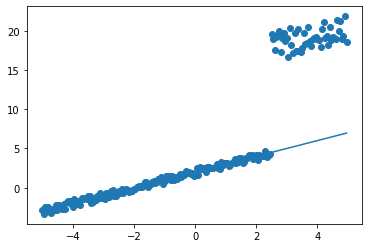

In [37]:
plt.scatter(X,Y)
Yp = rs.estimator_.intercept_ + X*rs.estimator_.coef_
plt.plot(X,Yp.reshape(-1,1))

In [38]:
from sklearn.linear_model import RANSACRegressor
lr = LinearRegression(normalize=True)
rs = RANSACRegressor(lr)
rs.fit(boston.data , boston.target)
rs.score(boston.data , boston.target)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklear

0.510341772912172

In [39]:
rs.estimator_.intercept_

-18.335772418219456

In [40]:
rs.estimator_.coef_

array([-3.91286605e-01,  3.64497601e-02,  1.74896964e-02,  1.13217617e+00,
        1.03809355e+01,  6.73293067e+00, -7.44671449e-02, -9.47585387e-01,
       -6.59698152e-02, -1.07161077e-03, -3.56739768e-01,  2.86768484e-02,
       -1.78615055e-01])

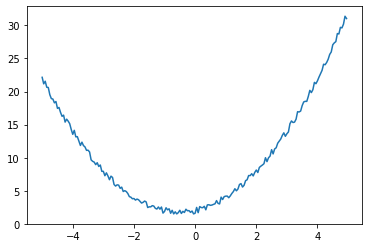

In [41]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1000)
nb_samples = 200
X = np.arange(-5, 5, 0.05)
Y = X + 2
Y += X**2 + np.random.uniform(-0.5, 0.5, size=nb_samples)
plt.plot(X, Y)


In [42]:
lr = LinearRegression(normalize=True)
lr.fit(X.reshape((-1, 1)), Y.reshape((-1, 1)))
lr.score(X.reshape((-1, 1)), Y.reshape((-1, 1)))


C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.11875441022664768

In [43]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(X.reshape(-1, 1))
Xp.shape

(200, 3)

In [44]:
lr.fit(Xp, Y.reshape((-1, 1)))
lr.score(Xp, Y.reshape((-1, 1)))

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.9986101328913373

In [45]:
from sklearn.datasets import load_boston
boston = load_boston()
pf = PolynomialFeatures(degree=2)
Xp = pf.fit_transform(boston.data)
lr = LinearRegression(normalize=True)
lr.fit(Xp, boston.target)
lr.score(Xp, boston.target)


C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this case special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Cal

0.9238660496912734

In [46]:
Xp.shape

(506, 105)

In [47]:
from sklearn.feature_selection import SelectFromModel
sm = SelectFromModel(lr, threshold=10)
Xt = sm.fit_transform(Xp, boston.target)
sm.estimator_.score(Xp, boston.target)

C:\Users\z3020\anaconda3\envs\tensorflow-gpu\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


0.9238660496912734

In [48]:
Xt.shape

(506, 8)